In [20]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [6]:
heights = pd.read_csv("heights.csv")
heights.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [7]:
heights.shape

(10000, 2)

## Using standard deviation

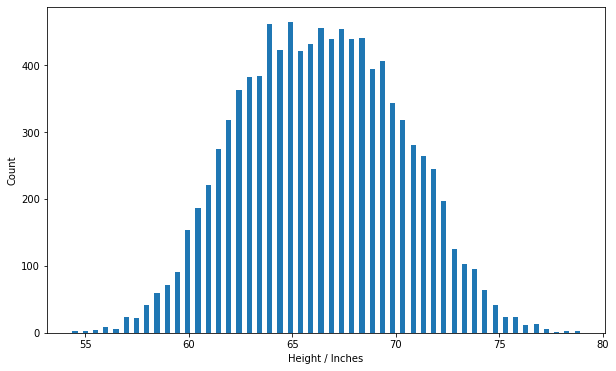

In [16]:
plt.hist(heights.height, bins=50, rwidth=0.5)
plt.xlabel("Height / Inches")
plt.ylabel("Count")
plt.show()

In [23]:
print(heights.height.min(), heights.height.max())

54.26313333 78.99874235


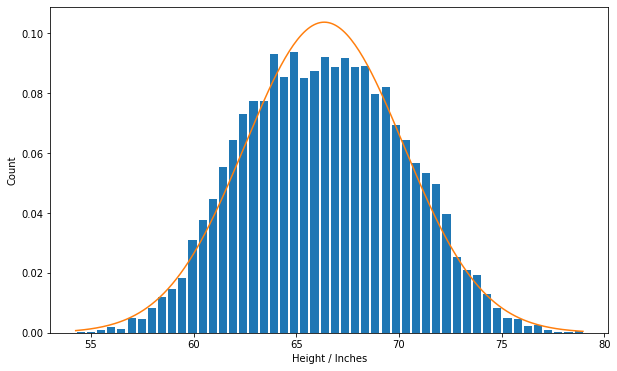

In [29]:
from scipy.stats import norm
import numpy as np

plt.hist(heights.height, bins = 50, rwidth = 0.8, density = True)
plt.xlabel("Height / Inches")
plt.ylabel("Count")

rng = np.arange(heights.height.min(), heights.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, heights.height.mean(), heights.height.std()) )


In [30]:
heights.describe()

height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

In [31]:
upper_limit = heights.height.mean() + 3*heights.height.std()
lower_limit = heights.height.mean() - 3*heights.height.std()
print(lower_limit, upper_limit)

54.824975392478876 77.91014411725232


In [34]:
heights[(heights.height>upper_limit) | (heights.height<lower_limit)]

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

In [39]:
df_data = heights[(heights.height<upper_limit)&(heights.height>lower_limit)]
df_data.shape

(9993, 3)

## Using z-score

In [36]:
heights['zscore'] = (heights.height - heights.height.mean()) / heights.height.std()
heights.head()

gender     height    zscore
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375

In [37]:
heights.shape

(10000, 3)

In [38]:
heights.describe()

height        zscore
count  10000.000000  1.000000e+04
mean      66.367560  1.062926e-13
std        3.847528  1.000000e+00
min       54.263133 -3.146027e+00
25%       63.505620 -7.438384e-01
50%       66.318070 -1.286272e-02
75%       69.174262  7.294819e-01
max       78.998742  3.282934e+00

In [42]:
df_zscore = heights[(heights.zscore<3)&(heights.zscore>-3)]
df_zscore.shape

(9993, 3)